In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.graphics.mosaicplot import mosaic

pd.set_option('display.max_columns', None)

plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})
plot_size = (14,7)

/home/asa/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_json('../data/data.json')

In [3]:
df.shape

(14337, 44)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   acct_type           14337 non-null  object 
 1   approx_payout_date  14337 non-null  int64  
 2   body_length         14337 non-null  int64  
 3   channels            14337 non-null  int64  
 4   country             14256 non-null  object 
 5   currency            14337 non-null  object 
 6   delivery_method     14321 non-null  float64
 7   description         14337 non-null  object 
 8   email_domain        14337 non-null  object 
 9   event_created       14337 non-null  int64  
 10  event_end           14337 non-null  int64  
 11  event_published     14238 non-null  float64
 12  event_start         14337 non-null  int64  
 13  fb_published        14337 non-null  int64  
 14  gts                 14337 non-null  float64
 15  has_analytics       14337 non-null  int64  
 16  has_

In [5]:
df.groupby('acct_type').count()

,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
acct_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
fraudster,437,437,437,437,437,425,437,437,437,437,423,437,437,437,437,272,437,437,437,437,437,437,437,437,413,437,413,437,437,437,418,437,437,437,437,437,437,437,330,330,330,330,330
fraudster_att,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5,3,5,5,5,5,5,5,5,5,4,5,4,5,5,5,4,5,5,5,5,5,5,5,4,4,4,4,4
fraudster_event,851,851,851,851,851,851,851,851,851,851,772,851,851,851,851,244,851,851,851,851,851,851,851,851,821,851,821,851,851,851,753,851,851,851,851,851,851,851,589,589,589,589,589
locked,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,41,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,54,51,51,51,51,51
premium,12373,12373,12373,12297,12373,12369,12373,12373,12373,12373,12368,12373,12373,12373,12373,7950,12373,12373,12373,12373,12373,12373,12373,12373,12369,12373,12369,12373,12373,12373,12337,12373,12373,12373,12373,12373,12373,12373,11700,11700,11700,11700,11700
spammer,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
spammer_limited,218,218,218,214,218,218,218,218,218,218,218,218,218,218,218,144,218,218,218,218,218,218,218,218,218,218,218,218,218,218,217,218,218,218,218,218,218,218,204,204,204,204,204
spammer_noinvite,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,59,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,84,82,82,82,82,82
spammer_warn,144,144,144,143,144,144,144,144,144,144,144,144,144,144,144,101,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,140,140,140,140,140


In [6]:
df['fraud'] = df['acct_type'].str[0] == 'f'
df.drop('acct_type',axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   approx_payout_date  14337 non-null  int64  
 1   body_length         14337 non-null  int64  
 2   channels            14337 non-null  int64  
 3   country             14256 non-null  object 
 4   currency            14337 non-null  object 
 5   delivery_method     14321 non-null  float64
 6   description         14337 non-null  object 
 7   email_domain        14337 non-null  object 
 8   event_created       14337 non-null  int64  
 9   event_end           14337 non-null  int64  
 10  event_published     14238 non-null  float64
 11  event_start         14337 non-null  int64  
 12  fb_published        14337 non-null  int64  
 13  gts                 14337 non-null  float64
 14  has_analytics       14337 non-null  int64  
 15  has_header          8928 non-null   float64
 16  has_

In [8]:
df.head()

,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud
0,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,1265630400,1.263110e+09,1265594400,0,0.00,0,1.0,0,y,"99 HOUR ""NO SLEEP"" SUPER BOWL CELEBRITY WEEKEN...",60,0,0,527017,,0.0,Party Starz Ent & Diverse Int'l Group,0.0,,,[],29.0,33,1,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,True
1,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,1296288000,1.293833e+09,1296255600,0,868.02,0,0.0,1,n,Winthrop RUF Winter Getaway,27,23,1,786878,"<p>Since 1987, RUF has ministered to students ...",0.0,RUF at Winthrop University,12.0,RUF,CHECK,"[{'name': 'RUF', 'created': '2010-10-01 01:10:...",28.0,28,0,"[{'event_id': 786878, 'cost': 35.0, 'availabil...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC,False
2,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,1295740800,1.291092e+09,1295713800,0,3500.00,0,NaN,0,y,DRDP (2010) Teacher Training,28,19,4,787337,"<p><a href=""http://www.desiredresults.com"">www...",0.0,University Preparation School in collaboration...,0.0,University Preparation School,CHECK,"[{'name': 'Danielle Severn', 'created': '2010-...",54.0,54,0,"[{'event_id': 787337, 'cost': 93.51, 'availabi...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA,False
3,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,1388534400,1.360683e+09,1360702800,0,1167.35,0,0.0,1,y,ITTA Affiliation 2013,21,39,16,885645,,0.0,,0.0,,ACH,"[{'name': '', 'created': '2010-11-09 01:10:15'...",0.0,0,0,"[{'event_id': 885645, 'cost': 25.0, 'availabil...",889,1283870102,3,,None,NaN,NaN,None,None,False
4,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,1297468800,1.291995e+09,1297440000,1,2313.15,0,0.0,0,y,Self Defense for Writers and Filmmakers: For A...,66,30,0,1114349,"<p><font face=""Arial""><font size=""2""><strong>T...",0.0,Arts & Business Council of Greater Boston,0.0,Arts and Business Council or Greater Boston,CHECK,[{'name': 'Arts and Business Council or Greate...,63.0,63,0,"[{'event_id': 1114349, 'cost': 150.0, 'availab...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA,False


In [9]:
def convertunix(columns,df=df):
    '''columns: list of column headers to convert
       df: name of df'''
    for val in columns:
        df[val] = pd.to_datetime(df[val],unit='s')
    return df

In [10]:
convert = ['approx_payout_date','event_created','event_published','event_start','event_end','user_created']
convertunix(convert)

,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud
0,2010-02-13 12:00:00,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,2010-01-06 01:01:46,2010-02-08 12:00:00,2010-01-10 07:50:38,2010-02-08 02:00:00,0,0.00,0,1.0,0,y,"99 HOUR ""NO SLEEP"" SUPER BOWL CELEBRITY WEEKEN...",60,0,0,527017,,0.0,Party Starz Ent & Diverse Int'l Group,0.0,,,[],29.0,33,1,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,2009-11-30 20:45:50,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,True
1,2011-02-03 08:00:00,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,2010-12-31 21:57:50,2011-01-29 08:00:00,2010-12-31 22:08:15,2011-01-28 23:00:00,0,868.02,0,0.0,1,n,Winthrop RUF Winter Getaway,27,23,1,786878,"<p>Since 1987, RUF has ministered to students ...",0.0,RUF at Winthrop University,12.0,RUF,CHECK,"[{'name': 'RUF', 'created': '2010-10-01 01:10:...",28.0,28,0,"[{'event_id': 786878, 'cost': 35.0, 'availabil...",149,2010-08-04 17:26:16,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC,False
2,2011-01-28 00:00:00,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,2010-11-30 04:22:36,2011-01-23 00:00:00,2010-11-30 04:38:28,2011-01-22 16:30:00,0,3500.00,0,NaN,0,y,DRDP (2010) Teacher Training,28,19,4,787337,"<p><a href=""http://www.desiredresults.com"">www...",0.0,University Preparation School in collaboration...,0.0,University Preparation School,CHECK,"[{'name': 'Danielle Severn', 'created': '2010-...",54.0,54,0,"[{'event_id': 787337, 'cost': 93.51, 'availabi...",214,2010-04-29 16:43:08,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA,False
3,2014-01-06 00:00:00,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,2013-02-12 15:06:10,2014-01-01 00:00:00,2013-02-12 15:37:26,2013-02-12 21:00:00,0,1167.35,0,0.0,1,y,ITTA Affiliation 2013,21,39,16,885645,,0.0,,0.0,,ACH,"[{'name': '', 'created': '2010-11-09 01:10:15'...",0.0,0,0,"[{'event_id': 885645, 'cost': 25.0, 'availabil...",889,2010-09-07 14:35:02,3,,None,NaN,NaN,None,None,False
4,2011-02-17 00:00:00,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,2010-12-10 15:24:26,2011-02-12 00:00:00,2010-12-10 15:29:26,2011-02-11 16:00:00,1,2313.15,0,0.0,0,y,Self Defense for Writers and Filmmakers: For A...,66,30,0,1114349,"<p><font face=""Arial""><font size=""2""><strong>T...",0.0,Arts & Business Council of Greater Boston,0.0,Arts and Business Council or Greater Boston,CHECK,[{'name': 'Arts and Business Council or Greate...,63.0,63,0,"[{'event_id': 1114349, 'cost': 150.0, 'availab...",35,2010-11-05 19:07:45,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14332,2013-02-24 07:00:00,667,0,US,USD,0.0,<p>Celebrates this wonderful holiday with the ...,yahoo.com,2013-02-08 04:33:13,2013-02-19 07:00:00,2013-02-08 04:45:52,2013-02-19 00:00:00,0,0.00,0,NaN,1,n,President's Day Celebration,27,0,0,5456442,,0.0,,0.0,,,[],11.0,11,1,"[{'event_id': 5456442, 'cost': 45.0, 'availabi...",0,2013-02-08 04:33:13,1,6100 North Charles Street,US,39.373780,-76.629921,Elkridge Club,MD,True
14333,2013-04-10 04:00:00,5812,5,US,USD,1.0,"<table style=""width: 600px;"" border=""0"" cellsp...",me.com,2013-02-08 23:44:02,2013-04

In [50]:
df_asa = df.loc[:,['listed', 'name', 'name_length', 'num_order', 'num_payouts',
       'object_id', 'org_desc', 'org_facebook', 'org_name', 'org_twitter',
       'payee_name', 'payout_type', 'previous_payouts', 'fraud']]
df_asa.head()

,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,fraud
0,y,"99 HOUR ""NO SLEEP"" SUPER BOWL CELEBRITY WEEKEN...",60,0,0,527017,,0.0,Party Starz Ent & Diverse Int'l Group,0.0,,,[],True
1,n,Winthrop RUF Winter Getaway,27,23,1,786878,"<p>Since 1987, RUF has ministered to students ...",0.0,RUF at Winthrop University,12.0,RUF,CHECK,"[{'name': 'RUF', 'created': '2010-10-01 01:10:...",False
2,y,DRDP (2010) Teacher Training,28,19,4,787337,"<p><a href=""http://www.desiredresults.com"">www...",0.0,University Preparation School in collaboration...,0.0,University Preparation School,CHECK,"[{'name': 'Danielle Severn', 'created': '2010-...",False
3,y,ITTA Affiliation 2013,21,39,16,885645,,0.0,,0.0,,ACH,"[{'name': '', 'created': '2010-11-09 01:10:15'...",False
4,y,Self Defense for Writers and Filmmakers: For A...,66,30,0,1114349,"<p><font face=""Arial""><font size=""2""><strong>T...",0.0,Arts & Business Council of Greater Boston,0.0,Arts and Business Council or Greater Boston,CHECK,[{'name': 'Arts and Business Council or Greate...,False


In [51]:
df_asa['previous_payout_count'] = [len(df_asa.previous_payouts[i]) for i in range(len(df_asa))]

In [80]:
df_asa.head()

,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,fraud,previous_payout_count,org_facebook_exists,org_twitter_exists
0,y,"99 HOUR ""NO SLEEP"" SUPER BOWL CELEBRITY WEEKEN...",60,0,0,527017,,0.0,Party Starz Ent & Diverse Int'l Group,0.0,,,[],True,0,0,0
1,n,Winthrop RUF Winter Getaway,27,23,1,786878,"<p>Since 1987, RUF has ministered to students ...",0.0,RUF at Winthrop University,12.0,RUF,CHECK,"[{'name': 'RUF', 'created': '2010-10-01 01:10:...",False,49,0,1
2,y,DRDP (2010) Teacher Training,28,19,4,787337,"<p><a href=""http://www.desiredresults.com"">www...",0.0,University Preparation School in collaboration...,0.0,University Preparation School,CHECK,"[{'name': 'Danielle Severn', 'created': '2010-...",False,36,0,0
3,y,ITTA Affiliation 2013,21,39,16,885645,,0.0,,0.0,,ACH,"[{'name': '', 'created': '2010-11-09 01:10:15'...",False,21,0,0
4,y,Self Defense for Writers and Filmmakers: For A...,66,30,0,1114349,"<p><font face=""Arial""><font size=""2""><strong>T...",0.0,Arts & Business Council of Greater Boston,0.0,Arts and Business Council or Greater Boston,CHECK,[{'name': 'Arts and Business Council or Greate...,False,49,0,0


In [77]:
print(df_asa['org_facebook'].isnull().sum())
print(df_asa['org_twitter'].isnull().sum())

0
0


In [76]:
df_asa['org_facebook'].fillna(value=0, inplace=True)
df_asa['org_twitter'].fillna(value=0, inplace=True)

In [79]:
df_asa['org_facebook_exists'] = [0 if df_asa['org_facebook'][i]==0 else 1 for i in range(len(df_asa))]
df_asa['org_twitter_exists'] = [0 if df_asa['org_twitter'][i]==0 else 1 for i in range(len(df_asa))]

[0, 100, 0, 500]

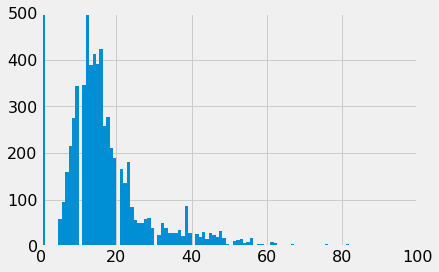

In [67]:
plt.hist(df_asa['org_facebook'], bins=100);
plt.axis([0, 100, 0, 500])

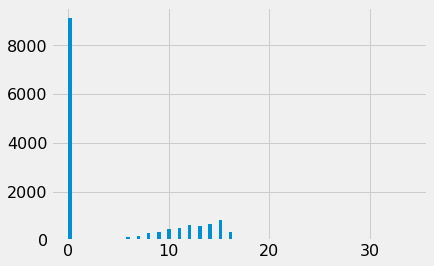

In [69]:
plt.hist(df_asa['org_twitter'], bins=100);
# plt.axis([0, 100, 0, 500])

In [60]:
df_fraud_payee_name = df_asa[(df_asa['payee_name']=='') & (df_asa['fraud']==True)]
df_fraud_payee_name.shape

(1263, 15)

In [48]:
df_asa['previous_payout_count'] = [len(df_asa.previous_payouts[i]) for i in range(len(df_prev_payout))]

In [47]:
df_asa.drop('previous_payout_count', axis=1)

,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,fraud,org_desc_exists,org_name_exists
0,y,"99 HOUR ""NO SLEEP"" SUPER BOWL CELEBRITY WEEKEN...",60,0,0,527017,,0.0,Party Starz Ent & Diverse Int'l Group,0.0,,,[],True,0,1
1,n,Winthrop RUF Winter Getaway,27,23,1,786878,"<p>Since 1987, RUF has ministered to students ...",0.0,RUF at Winthrop University,12.0,RUF,CHECK,"[{'name': 'RUF', 'created': '2010-10-01 01:10:...",False,1,1
2,y,DRDP (2010) Teacher Training,28,19,4,787337,"<p><a href=""http://www.desiredresults.com"">www...",0.0,University Preparation School in collaboration...,0.0,University Preparation School,CHECK,"[{'name': 'Danielle Severn', 'created': '2010-...",False,1,1
3,y,ITTA Affiliation 2013,21,39,16,885645,,0.0,,0.0,,ACH,"[{'name': '', 'created': '2010-11-09 01:10:15'...",False,0,0
4,y,Self Defense for Writers and Filmmakers: For A...,66,30,0,1114349,"<p><font face=""Arial""><font size=""2""><strong>T...",0.0,Arts & Business Council of Greater Boston,0.0,Arts and Business Council or Greater Boston,CHECK,[{'name': 'Arts and Business Council or Greate...,False,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14332,n,President's Day Celebration,27,0,0,5456442,,0.0,,0.0,,,[],True,0,0
14333,y,ARCS Foundation 2013 Scientist of the Year,42,33,4,5465112,"<p><span style=""font-family: arial,helvetica,s...",0.0,"ARCS Foundation, Inc., San Diego Chapter",0.0,"ARCS Foundation Inc., San Diego Chapter",CHECK,"[{'name': 'ARCS Foundation Inc., San Diego Cha...",False,1,1
14334,y,TIFFANTASY ENTERTAINMENT PRESENTS: Ruff and Re...,67,1,0,5465732,,0.0,Tiffantasy Entertainment,0.0,,ACH,"[{'name': '', 'created': '2013-05-16 03:26:11'...",False,0,1
14335,y,Valentines Day Dinner & Comedy Show At Salsa C...,54,2,101,5465810,,0.0,,0.0,,ACH,"[{'name': '', 'created': '2010-11-30 01:11:30'...",False,0,0


In [34]:
len(df_asa.org_desc[0])

0

In [ ]:
df_asa['org_desc_exists'] = [0 if len(df_asa['org_desc'][i])==0 else 1 for i in range(len(df_asa))]

In [44]:
df_asa['org_name_exists'] = [0 if len(df_asa['org_name'][i])==0 else 1 for i in range(len(df_asa))]

In [12]:
len(np.unique(df_asa.org_name))

9501

In [13]:
len(df_asa.name[3])

21

In [14]:
len(df_asa.previous_payouts[1])

49

In [15]:
df_asa.payout_type.value_counts()

ACH      10666
CHECK     3178
           493
Name: payout_type, dtype: int64

In [16]:
ax = df_asa['payout_type'].plot.hbar()
df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
ax = df.plot.bar(x='lab', y='val', rot=0)

AttributeError: 'PlotAccessor' object has no attribute 'hbar'

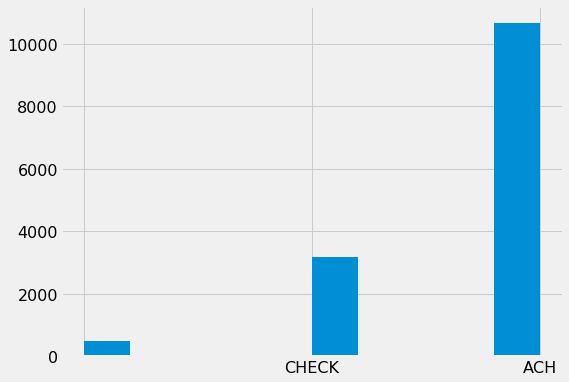

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(df_asa['payout_type'])
plt.show();

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

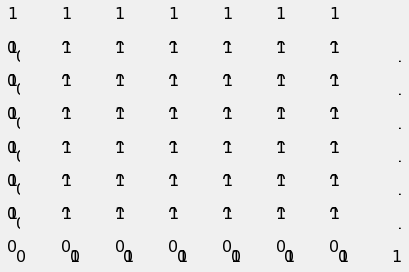

In [41]:
pd.plotting.scatter_matrix(df_asa)

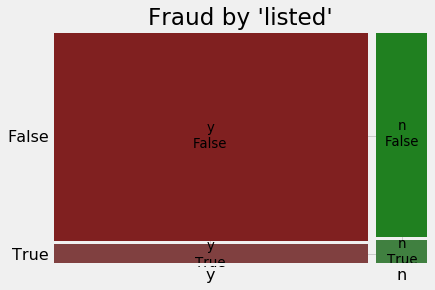

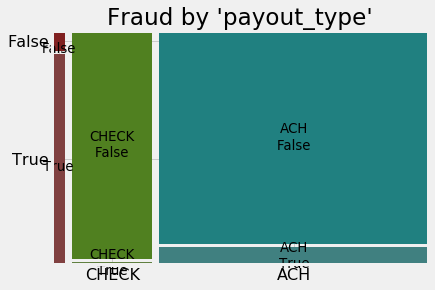

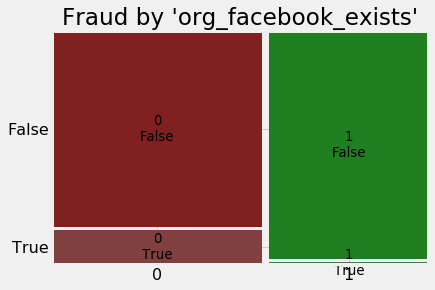

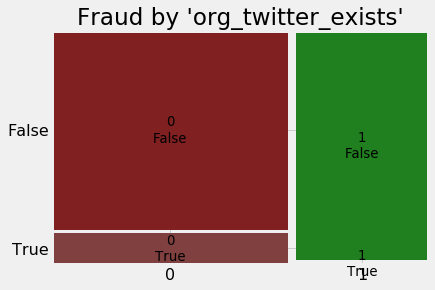

In [82]:
cols = ['listed','payout_type','org_facebook_exists','org_twitter_exists']
for col in cols:
    mosaic(df_asa, [col, 'fraud'], gap=0.02, title=f'Fraud by \'{col}\'')
    plt.savefig(f'../images/mosaic_fraud_by_{col}.png');

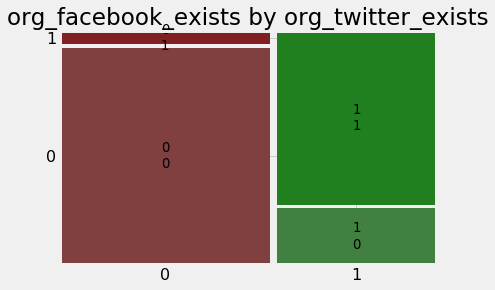

In [84]:
mosaic(df_asa, ['org_facebook_exists','org_twitter_exists'], gap=0.02, title='org_facebook_exists by org_twitter_exists');

,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,previous_payouts,fraud
payout_type,,,,,,,,,,,,,
,493,493,493,493,493,493,493,464,493,464,493,493,493
ACH,10666,10666,10666,10666,10666,10666,10666,10637,10666,10637,10666,10666,10666
CHECK,3178,3178,3178,3178,3178,3178,3178,3177,3178,3177,3178,3178,3178


In [57]:
col = 'org_name'
subset = pd.concat([df[col],df['fraud']], axis=1, sort=False)
subset.head()

,org_name,fraud
0,Party Starz Ent & Diverse Int'l Group,True
1,RUF at Winthrop University,False
2,University Preparation School in collaboration...,False
3,,False
4,Arts & Business Council of Greater Boston,False


In [59]:
df_fraud_subset = subset[subset['fraud']==True][col].value_counts().rename_axis(col).reset_index(name='counts')
# df_fraud_subset = df_fraud_subset[offenders['counts']>5]
df_fraud_subset.head(10)

,org_name,counts
0,,446
1,LIDF,26
2,Global Gas Card,25
3,Ultimate Wine,13
4,Premier Events,10
5,Unnamed Organizer,9
6,PocketPictures,9
7,Blow The Whistle On Bullying ~ It Matters What...,8
8,STYLEPARTIES,8
9,Mabs' Events,7


In [55]:
df_fraud = df_asa[df_asa['fraud']==True]
df_fraud.shape

(1293, 14)

In [56]:
df_no_fraud = df_asa[df_asa['fraud']!=True]
df_no_fraud.shape

(13044, 14)

In [118]:
df_no_fraud.head(10)

,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,fraud
1,n,Winthrop RUF Winter Getaway,27,23,1,786878,"<p>Since 1987, RUF has ministered to students ...",0.0,RUF at Winthrop University,12.0,RUF,CHECK,"[{'name': 'RUF', 'created': '2010-10-01 01:10:...",False
2,y,DRDP (2010) Teacher Training,28,19,4,787337,"<p><a href=""http://www.desiredresults.com"">www...",0.0,University Preparation School in collaboration...,0.0,University Preparation School,CHECK,"[{'name': 'Danielle Severn', 'created': '2010-...",False
3,y,ITTA Affiliation 2013,21,39,16,885645,,0.0,,0.0,,ACH,"[{'name': '', 'created': '2010-11-09 01:10:15'...",False
4,y,Self Defense for Writers and Filmmakers: For A...,66,30,0,1114349,"<p><font face=""Arial""><font size=""2""><strong>T...",0.0,Arts & Business Council of Greater Boston,0.0,Arts and Business Council or Greater Boston,CHECK,[{'name': 'Arts and Business Council or Greate...,False
5,y,Bluegrass Stallions vs Rochester Razorsharks,44,14,3,1179983,<p>The Bluegrass Stallions is Central Kentucky...,0.0,Bluegrass Stallions Basketball,0.0,Bluegrass Stallions,CHECK,"[{'name': 'Bluegrass Stallions', 'created': '2...",False
6,y,Fridays at Four Frederick 2011-02-11,36,12,3,1180179,"<div id=""organizer_display"">\r\n<p>Fridays at ...",0.0,NABOE Business Owner Networking,0.0,,ACH,"[{'name': '', 'created': '2011-01-12 01:12:34'...",False
7,y,When Jekyll Met Hyde (1960s),28,6,5,1180391,<p>The only performing arts venue in the south...,18.0,The Magnetic Theatre,0.0,,ACH,"[{'name': '', 'created': '2011-01-25 01:12:07'...",False
8,y,A Sweetheart Affair,19,12,0,1180423,,0.0,,0.0,,ACH,"[{'name': '', 'created': '2011-02-19 01:12:25'...",False
9,y,When Jekyll Met Hyde (1950s),28,14,9,1180435,<p>The only performing arts venue in the south...,18.0,The Magnetic Theatre,0.0,,ACH,"[{'name': '', 'created': '2011-01-25 01:12:07'...",False
10,y,Understanding and Supporting Families with Dom...,67,14,25,1180497,"<p><span style=""font-size: medium;""><span styl...",0.0,San Francisco Family Support Network,0.0,SFFSN,CHECK,[{'name': 'San Francisco Family Support Networ...,False


In [62]:
x_name = 'Org Name'
labels=df_fraud_subset['org_name']
fig, ax = plt.subplots(figsize=(14,7))
ax.bar(df_fraud_subset['org_name'],df_fraud_subset['counts'])
ax.set_xlabel(x_name)
ax.set_ylabel('Fraud Counts')
ax.set_title(f'Fraud Counts by {x_name}',fontweight='bold')
plt.tight_layout()
plt.xticks(rotation=45,ha='right')
# plt.savefig(f'../images/fraud_{x_name}.png')

ValueError: 
Top City Productions | Foot$$ Promotions | Intensity Enterprise  
                           ^
Expected end of text, found '$'  (at char 27), (line:1, col:28)

ValueError: 
Top City Productions | Foot$$ Promotions | Intensity Enterprise  
                           ^
Expected end of text, found '$'  (at char 27), (line:1, col:28)

<Figure size 1008x504 with 1 Axes>

In [19]:
col = 'previous_payouts'
df_prev_payout = pd.concat([df[col],df['fraud']], axis=1, sort=False)
df_prev_payout['prev_payout_count'] = [len(df_prev_payout.previous_payouts[i]) for i in range(len(df_prev_payout))]
df_prev_payout.head()

,previous_payouts,fraud,prev_payout_count
0,[],True,0
1,"[{'name': 'RUF', 'created': '2010-10-01 01:10:...",False,49
2,"[{'name': 'Danielle Severn', 'created': '2010-...",False,36
3,"[{'name': '', 'created': '2010-11-09 01:10:15'...",False,21
4,[{'name': 'Arts and Business Council or Greate...,False,49


In [20]:
df_prev_payout['previous_payouts'][1]

[{'name': 'RUF',
  'created': '2010-10-01 01:10:09',
  'country': 'US',
  'amount': 34389.38,
  'state': 'GA',
  'address': '1700 North Brown Road',
  'uid': 5419068,
  'event': 786869,
  'zip_code': '30043'},
 {'name': 'RUF',
  'created': '2011-02-02 01:12:10',
  'country': 'US',
  'amount': 764.93,
  'state': 'GA',
  'address': '1700 North Brown Road',
  'uid': 5419068,
  'event': 786878,
  'zip_code': '30043'},
 {'name': 'RUF',
  'created': '2011-03-15 01:30:42',
  'country': 'US',
  'amount': 17405.26,
  'state': 'GA',
  'address': '1700 North Brown Road',
  'uid': 5419068,
  'event': 1181203,
  'zip_code': '30043'},
 {'name': 'RUF',
  'created': '2011-03-15 01:30:42',
  'country': 'US',
  'amount': 2224.16,
  'state': 'GA',
  'address': '1700 North Brown Road',
  'uid': 5419068,
  'event': 1293213,
  'zip_code': '30043'},
 {'name': 'RUF',
  'created': '2011-04-01 01:30:31',
  'country': 'US',
  'amount': 5370.58,
  'state': 'GA',
  'address': '1700 North Brown Road',
  'uid': 5419

In [21]:
payout_count_fraud = df_prev_payout['prev_payout_count'][df_prev_payout['fraud']==True]
payout_count_no_fraud = df_prev_payout['prev_payout_count'][df_prev_payout['fraud']==False]
payout_counts = [payout_count_fraud, payout_count_no_fraud]

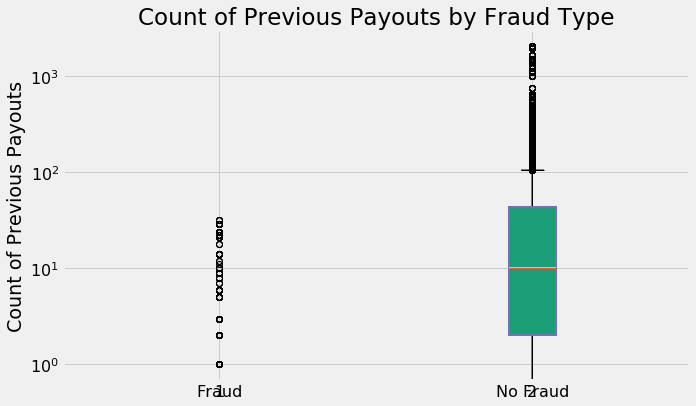

In [22]:

fig, ax = plt.subplots(figsize=(10,6))
bp = ax.boxplot(payout_counts, patch_artist=True)
# change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
    
ax.set_xticklabels(['Fraud', 'No Fraud'])
ax.set_yscale('log')
ax.set_ylabel('Count of Previous Payouts')
plt.title('Count of Previous Payouts by Fraud Type')
bp = ax.boxplot(payout_counts)
plt.savefig('../images/boxplot_previous_payout.png')

In [105]:
df_fraud = df_asa[df_asa['fraud']==True]
df_fraud.head(100)

,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,fraud
0,y,"99 HOUR ""NO SLEEP"" SUPER BOWL CELEBRITY WEEKEN...",60,0,0,527017,,0.0,Party Starz Ent & Diverse Int'l Group,0.0,,,[],True
26,n,Series 2 of CSI Seminars for Transformation Expo,48,1,0,1386643,,0.0,,0.0,,ACH,[],True
51,y,Mardi Gras Party and Celebration,32,7,1,1928009,,0.0,CP Enterprises,0.0,robert carter,CHECK,"[{'name': 'Royal Princesses and Knights', 'cre...",True
54,y,Real Estate Exhibition in London,32,9,0,1964043,"<p><span class=""vevent""><span class=""notransla...",0.0,The London Connection,12.0,,ACH,[],True
70,n,SHY'S BIRTHDAY/ANNIVERASRY BASH,31,3,0,2228484,<p>MMoMom</p>,35.0,Shyone Tha MainEvent,0.0,,ACH,[],True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,y,Juice Party,11,2,0,8310099,,0.0,,0.0,,ACH,[],True
996,y,Addicted to Drum & Bass,23,7,0,8324175,,0.0,Mr.Paradox & J-skeptik,0.0,,ACH,[],True
997,y,Paderborner HipHop Festival,27,5,0,8379817,,0.0,Sunshine Eventmanagment,0.0,,ACH,[],True
999,y,Bar club,8,0,0,8589103,,0.0,,0.0,,,[],True


In [ ]:
df_fraud[df_fraud['has_logo']==0]['fraud'].value_counts()
df[df['fraud']==True]['ha'].value_counts()

In [23]:
df_asa2 = df.loc[:,['listed', 'name', 'name_length', 'num_order', 'num_payouts',
       'object_id', 'org_desc', 'org_facebook', 'org_name', 'org_twitter',
       'payee_name', 'payout_type', 'previous_payouts','user_type', 'has_analytics','fraud']]

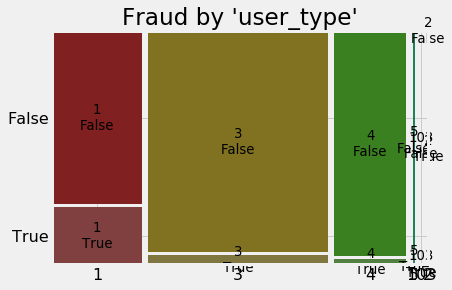

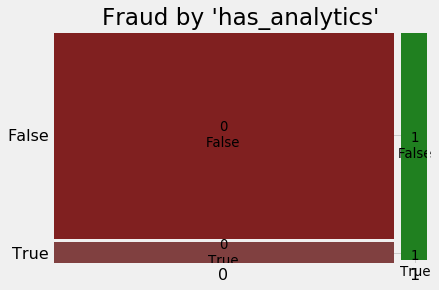

In [24]:
cols = ['user_type', 'has_analytics']
for col in cols:
    mosaic(df_asa2, [col, 'fraud'], gap=0.02, title=f'Fraud by \'{col}\'')
    plt.savefig(f'../images/mosaic_fraud_by_{col}.png');

In [87]:
df[87:88]

,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,fraud
87,2012-01-02 18:30:00,7825,10,US,USD,1.0,"<p style=""text-align: center; color: #000000;""...",greatworldadventures.com,2011-11-10 18:44:56,2011-12-28 18:30:00,2011-11-10 18:45:14,2011-12-28 17:30:00,0,255.08,1,1.0,0,y,#Horseback Riding on the Beach in FL - 2 TICKE...,54,1,658,2490702,"<p><span style=""font-family: arial,helvetica,s...",11.0,BeachHorses.com,15.0,,ACH,"[{'name': '', 'created': '2010-09-30 01:10:25'...",48.0,48,0,"[{'event_id': 2490702, 'cost': 119.95, 'availa...",1144,2008-09-22 21:29:08,3,Manatee Ave W and Palma Sola Blvd,US,27.49616,-82.643477,,,False


In [92]:
df.ticket_types[236:237]

236    [{'event_id': 4424320, 'cost': 127.74, 'availa...
Name: ticket_types, dtype: object